In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
location=os.getcwd()

In [21]:
#https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

In [19]:
df = pd.read_csv(location+'\\air-passengers\AirPassengers.csv', parse_dates = ['Month'], index_col = ['Month'])
df.columns=['Passengers']
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


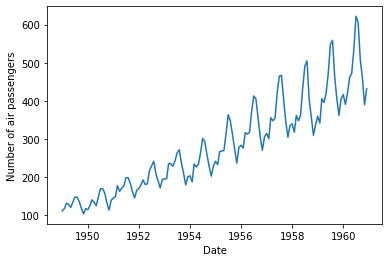

In [20]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df)

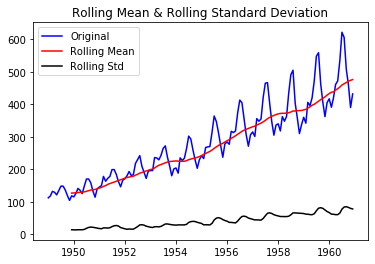

In [23]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [25]:
result = adfuller(df['Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.8153688792060423
p-value: 0.9918802434376409
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


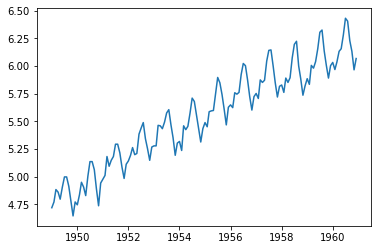

In [26]:
df_log = np.log(df)
plt.plot(df_log)

In [27]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

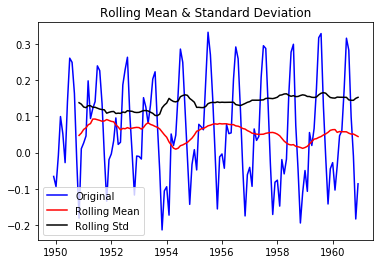

ADF Statistic: -3.162907991300858
p-value: 0.022234630001243844
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [29]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

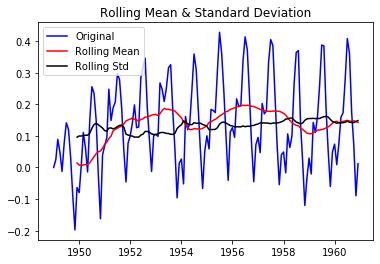

ADF Statistic: -3.601262420161679
p-value: 0.005736938801511851
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


In [31]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

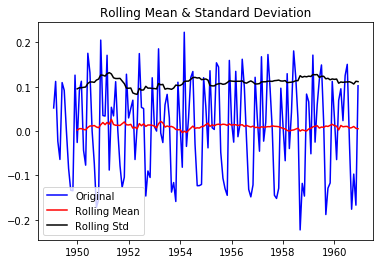

ADF Statistic: -2.717130598388145
p-value: 0.0711205481508568
Critical Values:
	1%: -3.4825006939887997
	5%: -2.884397984161377
	10%: -2.578960197753906


In [32]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)

get_stationarity(df_log_shift)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


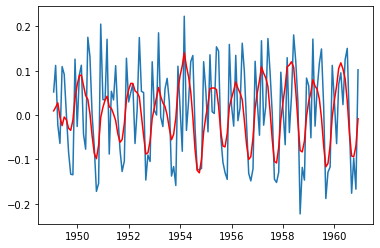

In [33]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

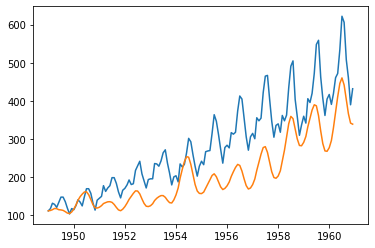

In [34]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

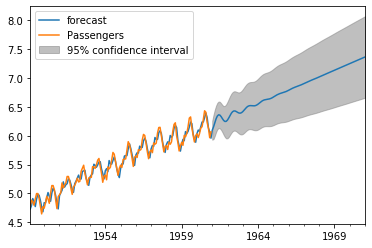

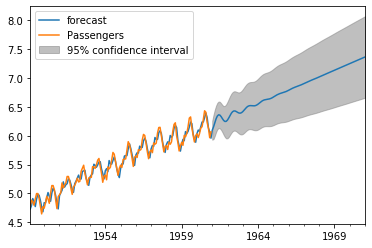

In [35]:
results.plot_predict(1,264)

_____________________________________

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [77]:
dateparse= lambda dates: pd.datetime.strptime(dates,'%Y-%m')

In [78]:
data=pd.read_csv(location+'\\air-passengers\AirPassengers.csv', parse_dates = ['Month'], index_col = ['Month'])
series=data['#Passengers']

Text(0, 0.5, 'Passengers')

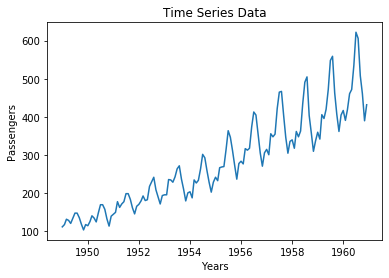

In [79]:
plt.plot(series)
plt.title("Time Series Data")
plt.xlabel("Years")
plt.ylabel("Passengers")

In [80]:
percent_training=0.7
split_point=round(len(series)*percent_training)
training,testing=series[0:split_point],series[split_point:]

Text(0, 0.5, 'Passengers')

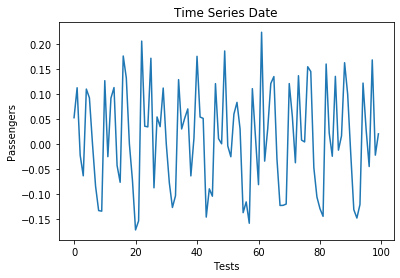

In [81]:
training=np.log(training)
training_diff=training.diff(periods=1).values[1:]

plt.plot(training_diff)
plt.title("Time Series Date")
plt.xlabel("Tests")
plt.ylabel("Passengers")

In [82]:
import statsmodels.tsa.stattools as sm

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


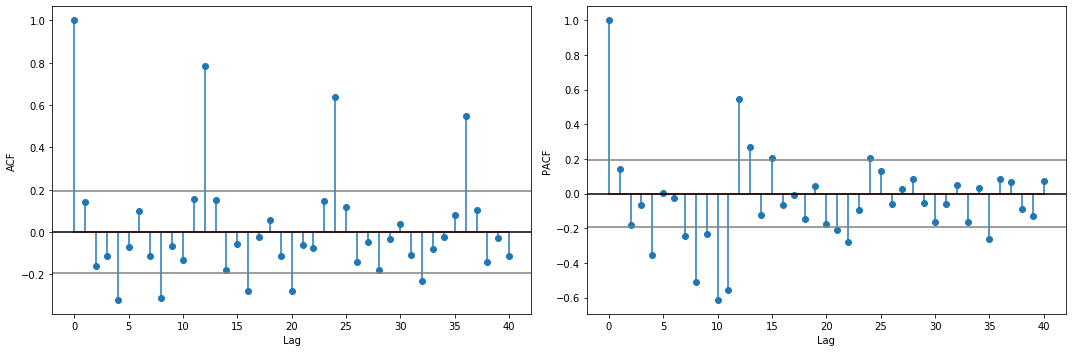

In [83]:
lag_acf=sm.acf(training_diff, nlags=40)
lag_pacf=sm.pacf(training_diff,nlags=40,method='ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='-',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='-',color='gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='-',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='-',color='gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

In [84]:
model=SARIMAX(training,order=(4,1,4),seasonal_order=(1,0,0,12),enforce_stationarity=False,enforce_invertibility=False)
model_fit=model.fit(disp=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


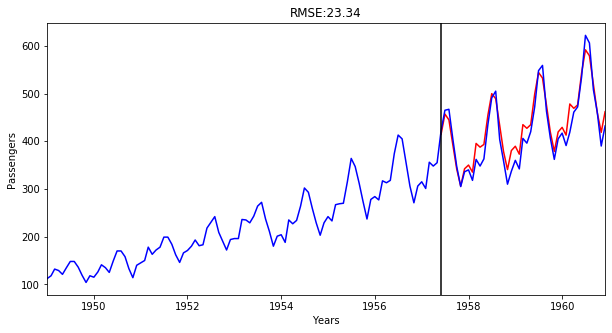

In [85]:
K=len(testing)
forecast=model_fit.forecast(K)
forecast=np.exp(forecast)

plt.figure(figsize=(10,5))
plt.plot(forecast,'r')
plt.plot(series,'b')
plt.title('RMSE:%.2f'%np.sqrt(sum((forecast-testing)**2)/len(testing)))
plt.xlabel('Years')
plt.ylabel('Passengers')
plt.autoscale(enable=True, axis='x',tight=True)
plt.axvline(x=series.index[split_point],color='black')